# Part2 EDA分析与聚类对比
---
## 2.1 EDA分析
### 2.1.1 运行准备

In [1]:
import data_prep
import common_dict

#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 2.1.2 导入数据，查看数据基本结构

In [3]:
# 证监会分类，百分比信息
df0z = data_prep.get_fund_data('fund_map_0_ZJH.csv')
# df0z.rename(columns=common_dict.zjhIndustryCodeToName,inplace=True)
df0z.head()

,fund_code,A,B,C,D,E,F,G,H,I,...,K,L,M,N,O,P,Q,R,S,X
0,000082,0.55,0.92,51.10,1.28,0.24,0.69,2.32,0.0,6.08,...,2.65,1.07,0.91,0.58,0.0,0.53,1.51,0.56,0.0,0.0
1,000309,0.00,0.00,36.64,0.00,0.00,0.01,5.68,0.0,14.94,...,0.00,0.00,6.75,0.02,0.0,0.00,0.00,0.00,0.0,0.0
2,000326,2.08,0.54,55.59,0.00,0.00,6.25,3.13,0.0,6.50,...,4.51,2.96,2.14,1.51,0.0,0.00,0.00,0.00,0.0,0.0
3,000409,0.00,0.00,91.19,0.00,0.00,0.00,0.00,0.0,1.54,...,0.00,0.61,0.03,0.01,0.0,0.00,0.00,0.00,0.0,0.0
4,000411,0.27,2.34,49.69,2.49,2.05,0.35,0.24,0.0,1.05,...,1.39,2.61,1.53,0.00,0.0,0.00,2.17,0.00,0.0,0.0


In [4]:
# 证监会分类，股本信息
df1z = data_prep.get_fund_data('fund_map_1_ZJH.csv')
# df1z.rename(columns=common_dict.zjhIndustryCodeToName,inplace=True)
df1z.head()

,fund_code,A,B,C,D,E,F,G,H,I,...,K,L,M,N,O,P,Q,R,S,X
0,000082,2067.631665,23435.381260,136493.269046,6597.946983,321.599160,288.236459,4817.321401,0.0,3609.814211,...,15793.275773,1903.917635,1994.355287,1054.641413,0.0,3268.721682,2080.535160,997.0114,0.0,0.0
1,000309,0.000000,0.000000,74432.779695,0.000000,0.000000,1.000000,3225.139216,0.0,12812.590708,...,0.000000,0.000000,13444.021241,4.034308,0.0,0.000000,0.000000,0.0000,0.0,0.0
2,000326,2739.298224,11663.589924,69730.483552,0.000000,0.000000,3765.656243,6454.434820,0.0,5088.097223,...,18023.838192,7266.416384,2796.080642,2348.471739,0.0,0.000000,0.000000,0.0000,0.0,0.0
3,000409,0.000000,0.000000,172074.069151,0.000000,0.000000,0.000000,0.000000,0.0,6874.534369,...,0.000000,1191.010055,2.287470,0.594700,0.0,0.000000,0.000000,0.0000,0.0,0.0
4,000411,1015.019181,36151.573720,204800.642597,13080.918735,10073.792575,1002.243375,1129.877385,0.0,1299.463543,...,3939.240536,16218.307881,2771.720349,0.000000,0.0,0.000000,1146.790843,0.0000,0.0,0.0


In [5]:
# 申万分类，百分比信息
df0s = data_prep.get_fund_data('fund_map_0_SW.csv')
df0s.rename(columns=common_dict.swIndustryCodeToName,inplace=True)
df0s.head()

,fund_code,采掘,化工,钢铁,有色金属,建筑材料,建筑装饰,电气设备,机械设备,国防军工,...,计算机,传媒,通信,公用事业,交通运输,房地产,银行,非银金融,综合,非H股
0,000082,0.83,3.76,1.48,3.49,1.47,1.05,4.59,2.16,1.42,...,3.39,2.49,1.03,1.86,2.32,2.65,8.23,10.64,0.30,0.0
1,000309,0.00,0.02,0.00,0.00,1.67,0.00,0.00,0.06,0.01,...,24.38,0.00,0.00,0.02,5.68,0.00,23.52,7.07,0.00,0.0
2,000326,0.47,8.99,0.00,3.13,0.64,0.97,4.36,1.17,1.95,...,5.69,1.06,1.06,1.51,3.13,4.51,4.39,0.00,0.01,0.0
3,000409,0.00,15.26,0.00,7.09,0.00,0.00,43.25,2.82,2.88,...,0.06,0.00,0.08,0.01,0.00,0.00,0.00,0.15,0.00,0.0
4,000411,1.34,2.00,1.63,1.94,0.46,2.05,5.19,3.35,1.41,...,0.64,1.21,0.32,2.49,0.84,1.39,12.52,13.02,0.00,0.0


In [6]:
# 申万分类，股本信息
df1s = data_prep.get_fund_data('fund_map_1_SW.csv')
df1s.rename(columns=common_dict.swIndustryCodeToName,inplace=True)
df1s.head()

,fund_code,采掘,化工,钢铁,有色金属,建筑材料,建筑装饰,电气设备,机械设备,国防军工,...,计算机,传媒,通信,公用事业,交通运输,房地产,银行,非银金融,综合,非H股
0,000082,706.723918,7191.229727,3738.068172,25884.688263,1423.394055,745.811469,11284.120277,1843.525674,2243.339225,...,2952.165435,5275.571016,748.723584,7660.866159,4817.321401,15793.275773,154963.601665,128193.850319,499.54071,0.0
1,000309,0.000000,4.802000,0.000000,0.000000,1061.070572,0.000000,0.000000,8.514102,2.102400,...,19097.001668,0.000000,0.000000,4.034308,3225.139216,0.000000,408908.601666,92772.566716,0.00000,0.0
2,000326,931.754367,11357.800285,0.000000,13893.450352,1373.563712,190.150070,2548.181967,4963.338404,391.161640,...,5103.741755,152.964360,383.936770,2355.683133,6454.434820,18023.838192,13633.229776,0.000000,0.76000,0.0
3,000409,0.000000,8193.486050,0.000000,9570.521927,0.000000,0.000000,72564.794750,2543.566467,2200.806882,...,34.723545,0.000000,22.845670,0.594700,0.000000,0.000000,0.000000,724.088535,0.00000,0.0
4,000411,10678.722420,5314.019128,7333.569716,26772.590860,604.708970,10073.792575,12953.654507,16440.354644,647.392218,...,628.015740,13412.425264,112.976528,13080.918735,2671.484528,3939.240536,272119.151624,156353.235402,0.00000,0.0


### 2.1.3 查看数据分布
1. 证监会类别按照百分比与股本分布

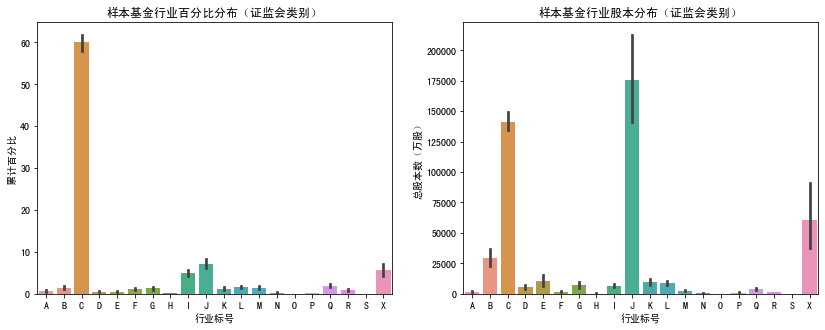

In [7]:
# 排除基金标号列
df0z_data = df0z.iloc[:, 1:]
df1z_data = df1z.iloc[:, 1:]

p1 = plt.figure(figsize=(14,5))
ax1 = p1.add_subplot(1,2,1)
sns.barplot(data=df0z_data)
plt.title("样本基金行业百分比分布（证监会类别）")
plt.ylabel('累计百分比')
plt.xlabel('行业标号')

ax2 = p1.add_subplot(1,2,2)
sns.barplot(data=df1z_data)
plt.title("样本基金行业股本分布（证监会类别）")
plt.ylabel('总股本数（万股）')
plt.xlabel('行业标号')

plt.show()

2. 申万类别按照百分比与股本分布

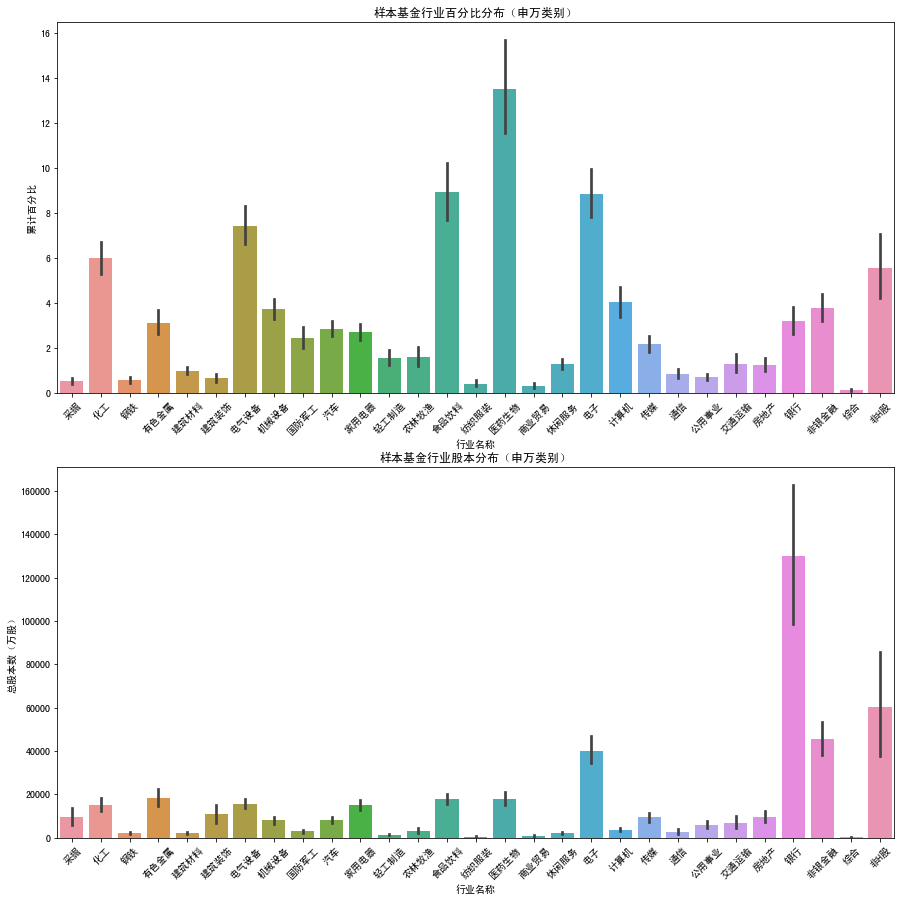

In [8]:
# 排除基金标号列
df0s_data = df0s.iloc[:, 1:]
df1s_data = df1s.iloc[:, 1:]

p1 = plt.figure(figsize=(15,15))
ax1 = p1.add_subplot(2,1,1)
sns.barplot(data=df0s_data)
plt.title("样本基金行业百分比分布（申万类别）")
plt.ylabel('累计百分比')
plt.xlabel('行业名称')
plt.xticks(rotation=45)

ax2 = p1.add_subplot(2,1,2)
sns.barplot(data=df1s_data)
plt.title("样本基金行业股本分布（申万类别）")
plt.ylabel('总股本数（万股）')
plt.xlabel('行业名称')
plt.xticks(rotation=45)

plt.show()

---
## 2.2 聚类分析
### 2.2.1 聚类前数据分析
使用T-SNE方法将数据降维到二维或三维，查看分布信息（论证TSNE的优越性）
1. 证监会数据分布（2/3 - 维度；z - 证监会；p - 百分比；s - 股本）

In [9]:
# 数据计算
tsne2zp=TSNE()
tsne2zp.fit_transform(df0z_data)
tsne2zp=pd.DataFrame(tsne2zp.embedding_,index=df0z_data.index)

tsne2zs=TSNE()
tsne2zs.fit_transform(df1z_data)
tsne2zs=pd.DataFrame(tsne2zs.embedding_,index=df1z_data.index)

# tsne3zp=TSNE(n_components=3)
# tsne3zp.fit_transform(df0z_data)
# tsne3zp=pd.DataFrame(tsne3zp.embedding_,index=df0z_data.index)

# tsne3zs=TSNE(n_components=3)
# tsne3zs.fit_transform(df1z_data)
# tsne3zs=pd.DataFrame(tsne3zs.embedding_,index=df1z_data.index)

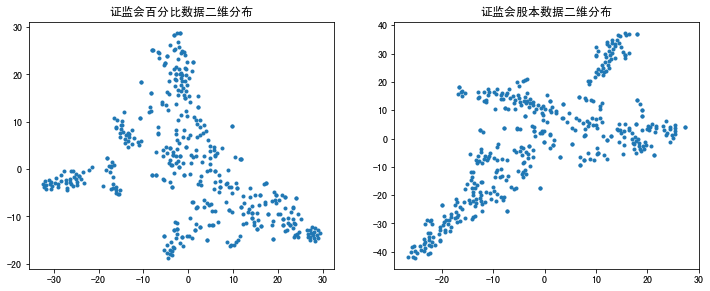

In [10]:
# 作图
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
fig = plt.plot(tsne2zp[0],tsne2zp[1],'.')
plt.title("证监会百分比数据二维分布")
                
# ax2 = p1.add_subplot(2,2,2, projection = '3d')
# plt.plot(tsne3zp[0],tsne3zp[1],tsne3zp[2],'.')
# plt.title("证监会百分比数据三维分布")  

ax3 = p1.add_subplot(2,2,2)
fig = plt.plot(tsne2zs[0],tsne2zs[1],'.')
plt.title("证监会股本数据二维分布")
                
# ax4 = p1.add_subplot(2,2,4, projection = '3d')
# plt.plot(tsne3zs[0],tsne3zs[1],tsne3zs[2],'.')
# plt.title("证监会股本数据三维分布")  

                
plt.show()

2. 申万数据分布（2/3 - 维度；s - 申万；p - 百分比；s - 股本）

In [11]:
# 数据计算
tsne2sp=TSNE()
tsne2sp.fit_transform(df0s_data)
tsne2sp=pd.DataFrame(tsne2sp.embedding_,index=df0s_data.index)

tsne2ss=TSNE()
tsne2ss.fit_transform(df1s_data)
tsne2ss=pd.DataFrame(tsne2ss.embedding_,index=df1s_data.index)

# tsne3sp=TSNE(n_components=3)
# tsne3sp.fit_transform(df0s_data)
# tsne3sp=pd.DataFrame(tsne3sp.embedding_,index=df0s_data.index)


# tsne3zs=TSNE(n_components=3)
# tsne3zs.fit_transform(df1z_data)
# tsne3zs=pd.DataFrame(tsne3zs.embedding_,index=df1z_data.index)

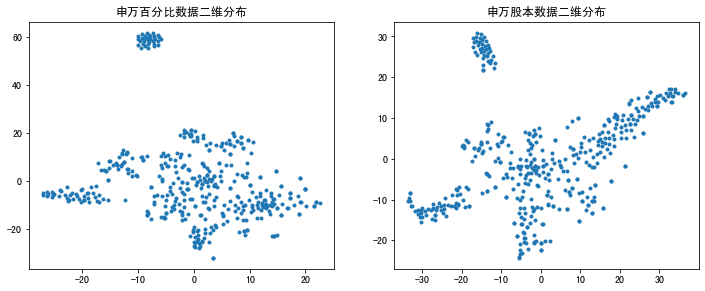

In [12]:
# 作图
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
fig = plt.plot(tsne2sp[0],tsne2sp[1],'.')
plt.title("申万百分比数据二维分布")
                
# ax2 = p1.add_subplot(2,2,2, projection = '3d')
# plt.plot(tsne3zp[0],tsne3zp[1],tsne3zp[2],'.')
# plt.title("证监会百分比数据三维分布")  

ax3 = p1.add_subplot(2,2,2)
fig = plt.plot(tsne2ss[0],tsne2ss[1],'.')
plt.title("申万股本数据二维分布")
                
# ax4 = p1.add_subplot(2,2,4, projection = '3d')
# plt.plot(tsne3zs[0],tsne3zs[1],tsne3zs[2],'.')
# plt.title("证监会股本数据三维分布")  

                
plt.show()

### 2.2.2 K-Means初步聚类
使用sklean实现k-means初步聚类
1. 聚类簇数与SSE比对

In [13]:
# 证监会百分比数据
sse0z = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df0z_data)
    sse0z[k] = kmeans.inertia_
    
sse1z = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df1z_data)
    sse1z[k] = kmeans.inertia_

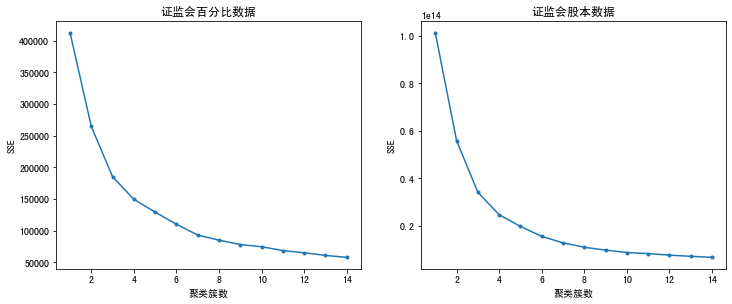

In [14]:
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
plt.plot(list(sse0z.keys()), list(sse0z.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("证监会百分比数据")

ax2 = p1.add_subplot(2,2,2)
plt.plot(list(sse1z.keys()), list(sse1z.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("证监会股本数据")

p1.show()

In [15]:
# 申万数据
sse0s = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df0s_data)
    sse0s[k] = kmeans.inertia_
    
sse1s = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df1s_data)
    sse1s[k] = kmeans.inertia_

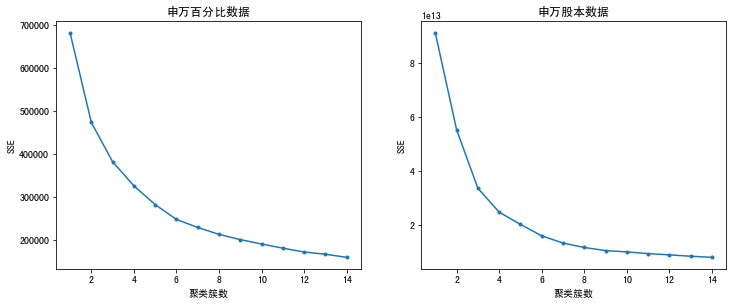

In [16]:
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
plt.plot(list(sse0s.keys()), list(sse0s.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("申万百分比数据")

ax2 = p1.add_subplot(2,2,2)
plt.plot(list(sse1s.keys()), list(sse1s.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("申万股本数据")

p1.show()

2. 选择不同K值聚类

In [17]:
clusters = [6, 7, 8]

# 证监局百分比数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df0z_data)
    pred.append(kmeans.predict(df0z_data))

# 聚类结果分类
predictions_zp = pd.DataFrame(pred).T
predictions_zp.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_zp.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        150         24         71
1        170        125        117
2         14        152         14
3         71         71         25
4          6         14          6
5         24         43         42
6          0          6         29
7          0          0        131


In [18]:
# 证监局股本数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df1z_data)
    pred.append(kmeans.predict(df1z_data))

# 聚类结果分类
predictions_zs = pd.DataFrame(pred).T
predictions_zs.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_zs.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        333        318         57
1         56         20         18
2          3          2          2
3         20          3         31
4         20          5         30
5          3         56          5
6          0         31        289
7          0          0          3


In [19]:
# 申万百分比数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df0s_data)
    pred.append(kmeans.predict(df0s_data))

# 聚类结果分类
predictions_sp = pd.DataFrame(pred).T
predictions_sp.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_sp.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0         35        117         47
1         33         33         95
2        238         29         33
3         33         32         27
4         58         46        151
5         38        142         36
6          0         36         13
7          0          0         33


In [20]:
# 申万股本数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df1s_data)
    pred.append(kmeans.predict(df1s_data))

# 聚类结果分类
predictions_ss = pd.DataFrame(pred).T
predictions_ss.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_ss.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        332          3         31
1          3         50         13
2         50          2          2
3          5         31        301
4         16        328         58
5         29         16          3
6          0          5         22
7          0          0          5


3. 聚类结果作图

<Figure size 432x288 with 0 Axes>

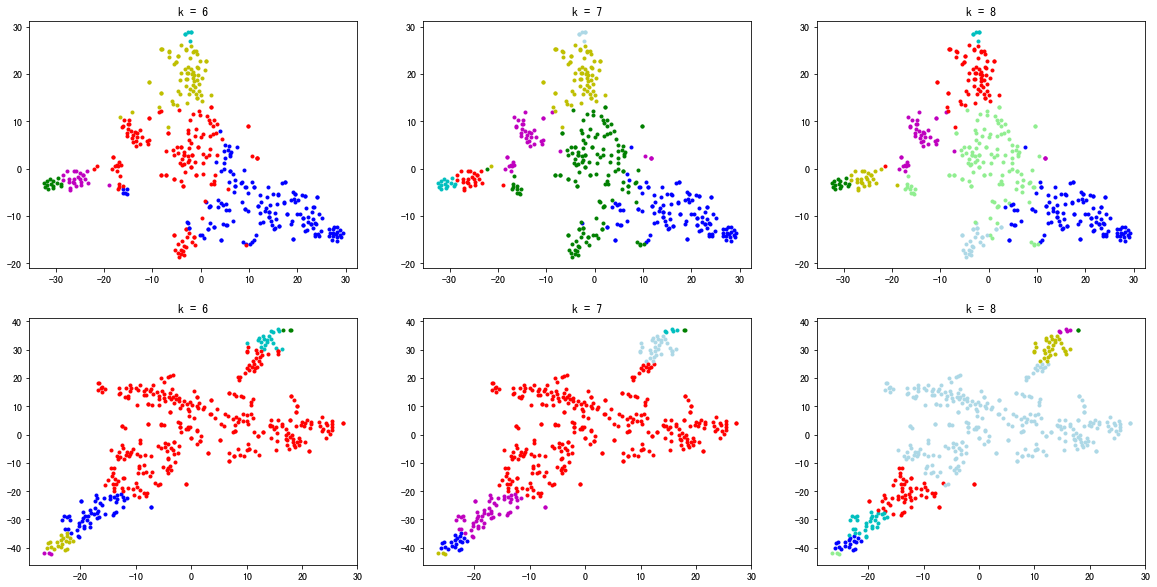

In [21]:
fig = plt.figure()
frame2zp = pd.DataFrame(tsne2zp)
# frame3zp = pd.DataFrame(tsne3zp)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2zp.shape

p1 = plt.figure(figsize=(20,10))
ax1 = p1.add_subplot(2,3,1)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_6'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax2 = p1.add_subplot(2,3,2)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_7'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax3 = p1.add_subplot(2,3,3)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_8'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")
    
frame2zs = pd.DataFrame(tsne2zs)
# frame3zs = pd.DataFrame(tsne3zs)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2zs.shape

ax4 = p1.add_subplot(2,3,4)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_6'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax5 = p1.add_subplot(2,3,5)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_7'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax6 = p1.add_subplot(2,3,6)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_8'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")

plt.show()

<Figure size 432x288 with 0 Axes>

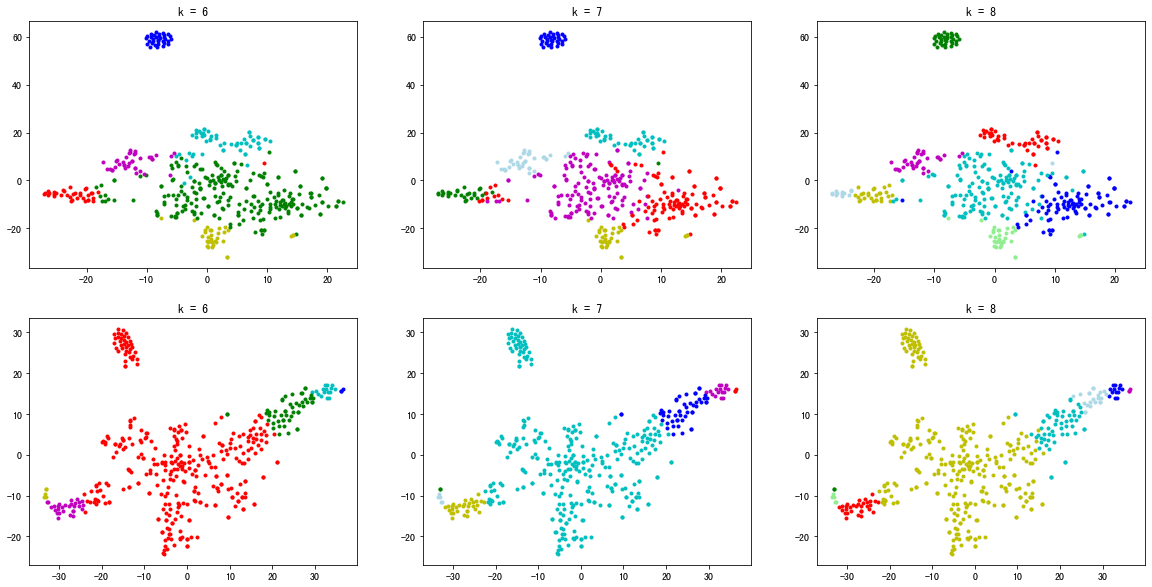

In [22]:
fig = plt.figure()
frame2sp = pd.DataFrame(tsne2sp)
# frame3sp = pd.DataFrame(tsne3sp)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2sp.shape

p1 = plt.figure(figsize=(20,10))
ax1 = p1.add_subplot(2,3,1)
for i in range(sampleNum):
    markIndex = predictions_sp['cluster_6'][i]
    plt.plot(frame2sp[0][i], frame2sp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax2 = p1.add_subplot(2,3,2)
for i in range(sampleNum):
    markIndex = predictions_sp['cluster_7'][i]
    plt.plot(frame2sp[0][i], frame2sp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax3 = p1.add_subplot(2,3,3)
for i in range(sampleNum):
    markIndex = predictions_sp['cluster_8'][i]
    plt.plot(frame2sp[0][i], frame2sp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")
    
frame2ss = pd.DataFrame(tsne2ss)
sampleNum, _ = frame2ss.shape

ax4 = p1.add_subplot(2,3,4)
for i in range(sampleNum):
    markIndex = predictions_ss['cluster_6'][i]
    plt.plot(frame2ss[0][i], frame2ss[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax5 = p1.add_subplot(2,3,5)
for i in range(sampleNum):
    markIndex = predictions_ss['cluster_7'][i]
    plt.plot(frame2ss[0][i], frame2ss[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax6 = p1.add_subplot(2,3,6)
for i in range(sampleNum):
    markIndex = predictions_ss['cluster_8'][i]
    plt.plot(frame2ss[0][i], frame2ss[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")

plt.show()

4. 聚类结果分析  
证监局百分比数据对应类别

In [23]:
# 证监局百分比聚类实际对应类别（k=7）
predictions = predictions_zp
means = df0z_data[predictions['cluster_7'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['name_0'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df0z_data[predictions['cluster_7'] == 1].mean().sort_values(ascending=False)
sorted_cate['name_1'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df0z_data[predictions['cluster_7'] == 2].mean().sort_values(ascending=False)
sorted_cate['name_2'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df0z_data[predictions['cluster_7'] == 3].mean().sort_values(ascending=False)
sorted_cate['name_3'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df0z_data[predictions['cluster_7'] == 4].mean().sort_values(ascending=False)
sorted_cate['name_4'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df0z_data[predictions['cluster_7'] == 5].mean().sort_values(ascending=False)
sorted_cate['name_5'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

means = df0z_data[predictions['cluster_7'] == 6].mean().sort_values(ascending=False)
sorted_cate['name_5'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head()


,name_0,mean_0,name_1,mean_1,name_2,mean_2,name_3,mean_3,name_4,mean_4,name_5,mean_5
0,制造业,35.967917,制造业,81.51576,制造业,62.908289,制造业,43.060000,非H股,76.853571,金融业,71.771667
1,非H股,35.783750,信息传输、软件和信息技术服务业,2.19848,金融业,4.591316,金融业,22.206338,制造业,10.494286,非H股,8.210000
2,信息传输、软件和信息技术服务业,3.683750,金融业,1.42248,卫生和社会工作,3.884868,房地产业,3.981831,信息传输、软件和信息技术服务业,0.525714,房地产业,5.393333
3,金融业,3.073333,租赁和商务服务业,1.29096,信息传输、软件和信息技术服务业,3.239605,交通运输、仓储和邮政业,3.508592,交通运输、仓储和邮政业,0.162857,制造业,5.208333
4,交通运输、仓储和邮政业,2.748750,采矿业,1.15352,科学研究和技术服务业,2.768684,信息传输、软件和信息技术服务业,3.404648,批发和零售业,0.107143,采矿业,0.801667


证监局股本数据对应类别

In [24]:
# 证监局股本聚类实际对应类别（k=6）
predictions = predictions_zs
means = df1z_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['name_0'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df1z_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['name_1'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df1z_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['name_2'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df1z_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['name_3'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df1z_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['name_4'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df1z_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['name_5'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

sorted_cate.head()

,name_0,mean_0,name_1,mean_1,name_2,mean_2,name_3,mean_3,name_4,mean_4,name_5,mean_5
0,制造业,142814.934363,金融业,489533.816402,非H股,2.590413e+06,金融业,1.329291e+06,非H股,592094.580905,金融业,2.759519e+06
1,金融业,40176.648072,制造业,149086.982108,制造业,7.723068e+03,制造业,1.794858e+05,制造业,79641.523195,采矿业,3.889102e+05
2,非H股,18339.675846,采矿业,58385.220563,农、林、牧、渔业,2.357605e+01,采矿业,1.198752e+05,金融业,40331.153643,制造业,1.365597e+05
3,采矿业,17493.892331,建筑业,49845.618477,电力、热力、燃气及水生产和供应业,0.000000e+00,建筑业,4.234759e+04,交通运输、仓储和邮政业,4785.102532,电力、热力、燃气及水生产和供应业,1.014045e+05
4,租赁和商务服务业,9413.003050,房地产业,34365.226535,科学研究和技术服务业,0.000000e+00,房地产业,3.122464e+04,采矿业,4756.942377,房地产业,3.883298e+04


In [25]:
# 申万百分比聚类实际对应类别（k=7）
predictions = predictions_sp
means = df0s_data[predictions['cluster_7'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['mean_0'] = list(means)

means = df0s_data[predictions['cluster_7'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['mean_1'] = list(means)

means = df0s_data[predictions['cluster_7'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['mean_2'] = list(means)

means = df0s_data[predictions['cluster_7'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['mean_3'] = list(means)

means = df0s_data[predictions['cluster_7'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['mean_4'] = list(means)

means = df0s_data[predictions['cluster_7'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['mean_5'] = list(means)

means = df0s_data[predictions['cluster_7'] == 6].mean().sort_values(ascending=False)
sorted_cate['cate_6'] = list(means.index)
sorted_cate['mean_6'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head(10)

,cate_0,mean_0,cate_1,mean_1,cate_2,mean_2,cate_3,mean_3,cate_4,mean_4,cate_5,mean_5,cate_6,mean_6
0,非银金融,10.135983,医药生物,87.623636,非H股,58.169310,食品饮料,46.940000,电气设备,23.445217,医药生物,13.614648,电子,37.601944
1,银行,9.671111,非H股,0.960909,食品饮料,5.460690,医药生物,6.370938,化工,21.593913,电子,9.786056,计算机,19.315000
2,食品饮料,8.808803,化工,0.463636,电子,5.459310,农林牧渔,5.758750,有色金属,12.887391,电气设备,9.235775,电气设备,7.825833
3,医药生物,5.776239,机械设备,0.326061,医药生物,2.886897,家用电器,5.182187,汽车,5.331522,食品饮料,8.073732,传媒,4.075000
4,电子,5.575983,计算机,0.221212,电气设备,2.352069,休闲服务,3.349375,电子,5.316087,化工,7.100493,非H股,3.156389
5,家用电器,4.582393,电气设备,0.151515,计算机,2.291034,电气设备,3.152812,机械设备,5.117609,机械设备,6.152746,机械设备,3.008056
6,汽车,3.523162,传媒,0.149697,农林牧渔,1.832414,非H股,3.031562,国防军工,4.168261,计算机,4.236056,国防军工,2.523611
7,房地产,3.309573,非银金融,0.148182,交通运输,1.588966,计算机,2.602500,计算机,1.560217,国防军工,3.409437,化工,2.514444
8,化工,3.300171,轻工制造,0.143939,化工,1.566207,机械设备,2.161563,建筑材料,1.507609,汽车,3.279296,通信,1.983889
9,电气设备,3.230769,食品饮料,0.126667,传媒,0.871724,化工,2.043750,家用电器,1.320435,有色金属,2.680634,有色金属,1.889444


In [26]:
# 申万股本聚类实际对应类别（k=6）
predictions = predictions_ss
means = df1s_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['mean_0'] = list(means)

means = df1s_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['mean_1'] = list(means)

means = df1s_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['mean_2'] = list(means)

means = df1s_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['mean_3'] = list(means)

means = df1s_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['mean_4'] = list(means)

means = df1s_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['mean_5'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head()

,cate_0,mean_0,cate_1,mean_1,cate_2,mean_2,cate_3,mean_3,cate_4,mean_4,cate_5,mean_5
0,电子,40075.452349,银行,2.758859e+06,银行,411769.870596,非H股,2.135631e+06,银行,1.210919e+06,非H股,402941.591282
1,非银金融,25591.636328,采掘,2.504436e+05,非银金融,158072.278620,银行,5.758851e+04,非银金融,1.833571e+05,电子,32786.603808
2,银行,22821.401970,化工,1.398522e+05,建筑装饰,56242.762959,房地产,1.159450e+04,采掘,6.856669e+04,银行,17941.677845
3,医药生物,20517.507344,公用事业,1.014058e+05,电子,43008.239187,机械设备,1.060669e+04,化工,6.283094e+04,食品饮料,17387.404614
4,有色金属,19474.852856,房地产,4.460380e+04,房地产,38238.491434,交通运输,9.658558e+03,电子,5.742862e+04,非银金融,17322.629046


In [27]:
print(list(df0s[predictions['cluster_6'] == 0]['fund_code']))
# df0s_data[predictions['cluster_7'] == 1]

['000082', '000326', '000409', '000418', '000471', '000513', '000524', '000549', '000577', '000586', '000592', '000594', '000628', '000696', '000697', '000711', '000729', '000746', '000751', '000756', '000778', '000780', '000793', '000828', '000831', '000854', '000866', '000867', '000884', '000913', '000925', '000955', '000960', '000971', '000974', '000978', '000985', '000996', '001008', '001009', '001028', '001036', '001039', '001040', '001042', '001043', '001044', '001047', '001048', '001050', '001054', '001070', '001072', '001097', '001104', '001105', '001126', '001158', '001163', '001166', '001167', '001171', '001178', '001186', '001188', '001193', '001195', '001223', '001230', '001236', '001245', '001313', '001319', '001396', '001404', '001409', '001410', '001421', '001476', '001482', '001496', '001520', '001521', '001528', '001542', '001576', '001579', '001616', '001626', '001628', '001643', '001644', '001645', '001651', '001663', '001672', '001677', '001678', '001692', '001696',

In [28]:
# ax4 = p1.add_subplot(2,3,4, projection = '3d')
# for i in range(sampleNum):
#     markIndex = predictions['cluster_6'][i]
#     plt.plot(frame3zp[0][i], frame3zp[1][i], frame3zp[2][i], c=color[markIndex], marker = '.')
    
# ax5 = p1.add_subplot(2,3,5, projection = '3d')
# for i in range(sampleNum):
#     markIndex = predictions['cluster_7'][i]
#     plt.plot(frame3zp[0][i], frame3zp[1][i], frame3zp[2][i], c=color[markIndex], marker = '.')
    
# ax6 = p1.add_subplot(2,3,6, projection = '3d')
# for i in range(sampleNum):
#     markIndex = predictions['cluster_8'][i]
#     plt.plot(frame3zp[0][i], frame3zp[1][i], frame3zp[2][i], c=color[markIndex], marker = '.')

In [33]:
# 申万百分比聚类实际对应类别（k=6）
predictions = predictions_sp
means = df0s_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['mean_0'] = list(means)

means = df0s_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['mean_1'] = list(means)

means = df0s_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['mean_2'] = list(means)

means = df0s_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['mean_3'] = list(means)

means = df0s_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['mean_4'] = list(means)

means = df0s_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['mean_5'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head(10)

,cate_0,mean_0,cate_1,mean_1,cate_2,mean_2,cate_3,mean_3,cate_4,mean_4,cate_5,mean_5
0,非H股,53.272286,医药生物,87.623636,医药生物,10.212689,食品饮料,46.423333,电气设备,22.576897,电子,36.540789
1,食品饮料,6.897429,非H股,0.960909,食品饮料,8.501050,医药生物,7.518485,化工,19.003966,计算机,19.357368
2,电子,5.002000,化工,0.463636,电子,7.583445,农林牧渔,5.586364,有色金属,10.986724,电气设备,7.760526
3,医药生物,4.250571,机械设备,0.326061,非银金融,5.966807,家用电器,5.203939,电子,7.414310,传媒,3.934737
4,电气设备,2.925429,计算机,0.221212,电气设备,5.929202,休闲服务,3.368788,机械设备,5.537241,机械设备,3.176579
5,农林牧渔,2.256286,电气设备,0.151515,银行,5.513403,电气设备,3.057273,汽车,5.286034,非H股,2.990263
6,计算机,2.090857,传媒,0.149697,化工,5.292395,非H股,2.939697,国防军工,4.493793,化工,2.732895
7,交通运输,1.641429,非银金融,0.148182,机械设备,4.543782,计算机,2.620000,计算机,1.789310,国防军工,2.677632
8,化工,1.571714,轻工制造,0.143939,家用电器,3.545882,机械设备,2.096061,医药生物,1.593276,有色金属,2.280789
9,家用电器,1.473143,食品饮料,0.126667,汽车,3.366387,化工,2.071818,非银金融,1.587931,医药生物,1.992368


In [30]:
# 证监局百分比聚类实际对应类别（k=6）
predictions = predictions_zp
means = df0z_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['name_0'] = sorted_cate['cate_0'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df0z_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['name_1'] = sorted_cate['cate_1'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df0z_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['name_2'] = sorted_cate['cate_2'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df0z_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['name_3'] = sorted_cate['cate_3'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df0z_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['name_4'] = sorted_cate['cate_4'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df0z_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['name_5'] = sorted_cate['cate_5'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

sorted_cate.head()

,cate_0,name_0,mean_0,cate_1,name_1,mean_1,cate_2,name_2,mean_2,cate_3,name_3,mean_3,cate_4,name_4,mean_4,cate_5,name_5,mean_5
0,C,制造业,58.335067,C,制造业,78.303118,X,非H股,76.853571,C,制造业,42.218451,J,金融业,71.771667,C,制造业,35.967917
1,I,信息传输、软件和信息技术服务业,9.150733,I,信息传输、软件和信息技术服务业,2.144588,C,制造业,10.494286,J,金融业,22.246761,X,非H股,8.210000,X,非H股,35.783750
2,J,金融业,4.385467,J,金融业,1.948000,I,信息传输、软件和信息技术服务业,0.525714,I,信息传输、软件和信息技术服务业,4.478310,K,房地产业,5.393333,I,信息传输、软件和信息技术服务业,3.683750
3,Q,卫生和社会工作,3.318800,Q,卫生和社会工作,1.597529,G,交通运输、仓储和邮政业,0.162857,K,房地产业,3.981831,C,制造业,5.208333,J,金融业,3.073333
4,M,科学研究和技术服务业,2.433733,L,租赁和商务服务业,1.460647,F,批发和零售业,0.107143,G,交通运输、仓储和邮政业,3.445775,B,采矿业,0.801667,G,交通运输、仓储和邮政业,2.748750


In [31]:
# 证监局百分比聚类实际对应类别（k=8）
means = df0z_data[predictions['cluster_8'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['name_0'] = sorted_cate['cate_0'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df0z_data[predictions['cluster_8'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['name_1'] = sorted_cate['cate_1'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df0z_data[predictions['cluster_8'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['name_2'] = sorted_cate['cate_2'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df0z_data[predictions['cluster_8'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['name_3'] = sorted_cate['cate_3'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df0z_data[predictions['cluster_8'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['name_4'] = sorted_cate['cate_4'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df0z_data[predictions['cluster_8'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['name_5'] = sorted_cate['cate_5'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

means = df0z_data[predictions['cluster_8'] == 6].mean().sort_values(ascending=False)
sorted_cate['cate_6'] = list(means.index)
sorted_cate['name_6'] = sorted_cate['cate_6'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_6'] = list(means)

means = df0z_data[predictions['cluster_8'] == 7].mean().sort_values(ascending=False)
sorted_cate['cate_7'] = list(means.index)
sorted_cate['name_7'] = sorted_cate['cate_7'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_7'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head()

,cate_0,name_0,mean_0,cate_1,name_1,mean_1,cate_2,name_2,mean_2,cate_3,name_3,mean_3,cate_4,name_4,mean_4,cate_5,name_5,mean_5,cate_6,name_6,mean_6,cate_7,name_7,mean_7
0,C,制造业,43.060000,C,制造业,82.085128,X,非H股,76.853571,C,制造业,36.4136,J,金融业,71.771667,C,制造业,52.024048,C,制造业,61.273793,C,制造业,64.038321
1,J,金融业,22.206338,I,信息传输、软件和信息技术服务业,2.121197,C,制造业,10.494286,X,非H股,35.0188,X,非H股,8.210000,I,信息传输、软件和信息技术服务业,24.477143,Q,卫生和社会工作,15.157931,J,金融业,5.426412
2,K,房地产业,3.981831,L,租赁和商务服务业,1.322650,I,信息传输、软件和信息技术服务业,0.525714,I,信息传输、软件和信息技术服务业,3.5556,K,房地产业,5.393333,X,非H股,3.775476,M,科学研究和技术服务业,10.374828,I,信息传输、软件和信息技术服务业,4.036412
3,G,交通运输、仓储和邮政业,3.508592,J,金融业,1.320769,G,交通运输、仓储和邮政业,0.162857,J,金融业,3.2216,C,制造业,5.208333,J,金融业,2.765714,F,批发和零售业,2.599310,L,租赁和商务服务业,2.213130
4,I,信息传输、软件和信息技术服务业,3.404648,B,采矿业,1.195043,F,批发和零售业,0.107143,G,交通运输、仓储和邮政业,2.7536,B,采矿业,0.801667,R,文化、体育和娱乐业,2.251905,X,非H股,1.093448,B,采矿业,1.807939
